# TECNOLOGICO DE MONTEREY
## Actividad Semanal -- 7 Regresiones
### Maria de La Paz Rico

Noviembre - 2022

 Cristian Miranda - A01793718


In [26]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge,Lasso,LinearRegression

# Ejercicio 1

**Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.**

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [21]:
# Lectura de datos
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df = df.sort_values(by=['Manufacturing Cost'],ascending=True,ignore_index=True)
print(df.shape)
df.sample(10)

(1000, 2)


,Number of Units,Manufacturing Cost
93,6.128389,29.321686
692,4.797410,42.534884
100,4.615855,29.621427
562,4.051577,39.644420
729,4.548429,43.816361
924,2.566028,55.103556
393,4.859392,36.102705
685,4.663495,42.261471
738,4.262271,44.140036
264,4.950786,33.223241


In [22]:
# Estadistica descriptiva
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Number of Units,1000.0,4.472799,1.336241,1.0,3.594214,4.435958,5.324780,10.0
Manufacturing Cost,1000.0,40.052999,10.595322,20.0,32.912036,38.345781,44.531822,100.0


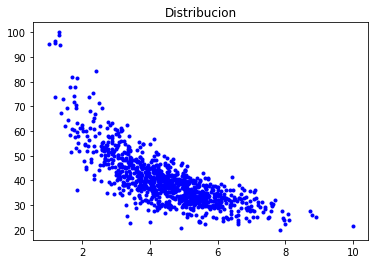

In [27]:
# Seleccion de variables
X = df[['Number of Units']]
y = df['Manufacturing Cost']

# Grafica de datos
plt.plot(X,y,'b.')
plt.title('Distribucion')
plt.show()

#### Divide los datos del costo de manufactura.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print('X de entrenamiento:',X_train.shape)
print('y de entrenamiento:',y_train.shape)
print('X de test:',X_test.shape)
print('y de test:',y_test.shape)

X de entrenamiento: (900, 1)
y de entrenamiento: (900,)
X de test: (100, 1)
y de test: (100,)


#### Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada

In [41]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_train)

linear_reg.intercept_, linear_reg.coef_

(66.91753072224289, array([-6.02200968]))

Modelo estimado:

$\hat{y} =  66.92 - 6.02X$

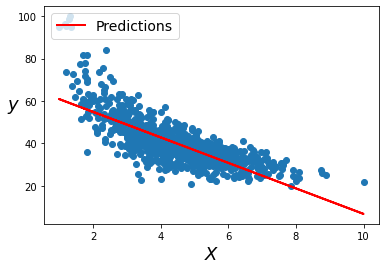

In [42]:
# construct best fit line
plt.scatter(X, y)
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [45]:
# Errores
mae_lm = mean_absolute_error(y_train, y_pred).round(2)
rmse_lm = np.sqrt(mean_squared_error(y_train, y_pred)).round(2)
r2_lm = r2_score(y_train, y_pred).round(2)

print('Error medio Absoluto (MAE):',mae_lm )
print('Root Mean Squared Error:', rmse_lm )
print('r2_score',r2_lm)

Error medio Absoluto (MAE): 4.91
Root Mean Squared Error: 6.87
r2_score 0.57


#### Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [46]:
# Polinomial 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

linear_reg.fit(X_poly, y_train)

y_pred_poly = linear_reg.predict(X_poly)

linear_reg.intercept_, linear_reg.coef_

(89.34650478154224, array([-16.68498748,   1.16065075]))

Modelo estimado:

$\hat{y} =  89.35 - 16.68X + 1.16X^2$

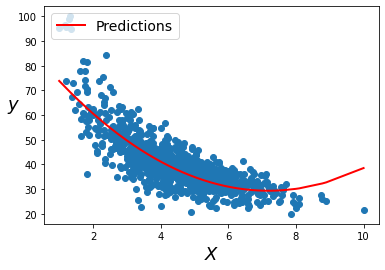

In [63]:
# construct best fit line
df_pol = pd.DataFrame({ 'x_pol':X_train['Number of Units'],
                        'y_pol':y_pred_poly
                        } )

df_pol = df_pol.sort_values(by=['x_pol'],ascending=True)

plt.scatter(X, y)
plt.plot(df_pol['x_pol'], df_pol['y_pol'], "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [64]:
# Errores
mae_pol = mean_absolute_error(y_train, y_pred_poly).round(2)
rmse_pol = np.sqrt(mean_squared_error(y_train, y_pred_poly)).round(2)
r2_pol = r2_score(y_train, y_pred_poly).round(2)

print('Error medio Absoluto (MAE):',mae_pol )
print('Root Mean Squared Error:', rmse_pol )
print('r2_score',r2_pol)

Error medio Absoluto (MAE): 4.52
Root Mean Squared Error: 6.15
r2_score 0.66


#### Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

##### **Ridge**

In [81]:
# Ridge
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train,y_train)
y_pred_ridge = ridge_reg.predict(X_train)

ridge_reg.intercept_, ridge_reg.coef_

(66.91736095757275, array([-6.02197164]))

Modelo estimado:

$\hat{y} =  66.92 - 6.02X$

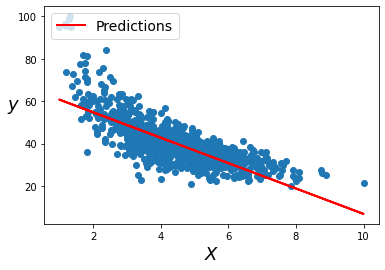

In [74]:
# construct best fit line
plt.scatter(X, y)
plt.plot(X_train, y_pred_ridge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [76]:
# Errores
mae_ridge = mean_absolute_error(y_train, y_pred_ridge).round(2)
rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge)).round(2)
r2_ridge = r2_score(y_train, y_pred_ridge).round(2)

print('Error medio Absoluto (MAE):',mae_ridge )
print('Root Mean Squared Error:', rmse_ridge )
print('r2_score',r2_ridge)

Error medio Absoluto (MAE): 4.91
Root Mean Squared Error: 6.87
r2_score 0.57


#### **Lasso**

In [86]:
# Lasso
lasso_reg = Lasso(alpha=10)
lasso_reg.fit(X_train,y_train)
y_pred_lasso = lasso_reg.predict(X_train)

lasso_reg.intercept_, lasso_reg.coef_

(41.545740185553825, array([-0.33704617]))

Modelo estimado:

$\hat{y} =  41.55 - 0.34X $

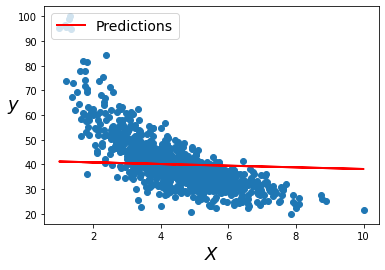

In [87]:
# construct best fit line
plt.scatter(X, y)
plt.plot(X_train, y_pred_lasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [88]:
# Errores
mae_lasso = mean_absolute_error(y_train, y_pred_lasso).round(2)
rmse_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso)).round(2)
r2_lasso = r2_score(y_train, y_pred_lasso).round(2)

print('Error medio Absoluto (MAE):',mae_lasso )
print('Root Mean Squared Error:', rmse_lasso )
print('r2_score',r2_lasso)

Error medio Absoluto (MAE): 7.28
Root Mean Squared Error: 10.2
r2_score 0.06


**Finalmente grafica:  
MAE (de los cuatro métodos)  
R2 (de los cuatro métodos)**

In [111]:
a =pd.DataFrame(
    {'MODELO':['LR','Polinomial','Ridge','Lasso'],
'MAE':[mae_lm, mae_pol ,mae_ridge,mae_lasso],
'R2':[r2_lm, r2_pol ,r2_ridge,r2_lasso]}
)
a.head()

,MODELO,MAE,R2
0,LR,4.91,0.57
1,Polinomial,4.52,0.66
2,Ridge,4.91,0.57
3,Lasso,7.28,0.06


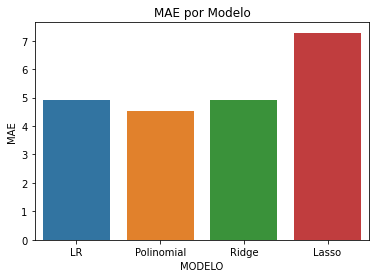

In [116]:
sns.barplot(data=a, x="MODELO", y="MAE")
plt.title('MAE por Modelo')
plt.show()

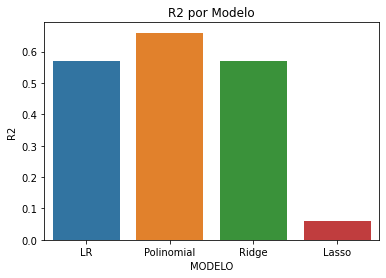

In [117]:
sns.barplot(data=a, x="MODELO", y="R2")
plt.title('R2 por Modelo')
plt.show()

**Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

La distribución de los datos refrejaban una tendencia no lineal por lo que el modelo con mejor performance en efecto es el modelo polinomial de 2o grado. Esto se evidencia incluso en las gráficas de R2 y MAE que deberian ser Altas y bajas respectivamente por lo que es el método que más le conviene a la empresa.

El porcentaje de entrenamiento y test fue de 90% y 10% respectivamente. En cuanto a los errores, se evidencia que para el modelo polinomía fue menor y es relativamente bueno ya que el R2 es alto

# Ejercicio 2

Encuentra el mejor regresor para los datos de las casas:

In [119]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9722,8691410310,20150213T000000,680000.0,4,2.50,3290,6012,2.0,0,0,...,9,3290,0,2005,0,98075,47.5961,-121.980,3210,6005
5199,3475000080,20140828T000000,710000.0,3,2.00,1780,9732,1.0,0,0,...,8,1780,0,1967,0,98040,47.5796,-122.229,1900,10200
11104,1088800060,20141105T000000,575000.0,3,2.50,2270,9600,2.0,0,0,...,9,2270,0,1990,0,98011,47.7388,-122.206,2580,9617
11852,2241700075,20141022T000000,310000.0,3,1.00,1180,8474,1.5,0,0,...,7,1180,0,1956,0,98155,47.7416,-122.327,1180,7200
3501,5525400300,20140521T000000,619420.0,4,2.75,2450,14803,2.0,0,0,...,9,2450,0,1988,0,98059,47.5261,-122.162,2330,14803
20030,3814900750,20140716T000000,399440.0,4,2.50,2311,4396,2.0,0,0,...,9,2311,0,2014,0,98092,47.3276,-122.163,2458,4616
6418,5569700020,20140730T000000,795000.0,4,2.50,3230,19193,1.0,0,3,...,8,2000,1230,1973,0,98075,47.5755,-122.070,3230,13420
5746,9542801310,20150513T000000,267000.0,3,2.25,2510,9900,1.0,0,0,...,8,1610,900,1978,0,98023,47.2988,-122.374,1940,8510
7439,8044700010,20150427T000000,630000.0,3,1.75,1940,7306,1.0,0,0,...,8,1470,470,1982,0,98052,47.6632,-122.153,2360,8865
15776,5528600050,20150211T000000,546000.0,2,1.00,1200,12856,1.0,0,0,...,6,1200,0,1948,0,98027,47.5321,-122.034,1740,6098


In [121]:
# Estadistica descriptiva
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [122]:
# Renombrando
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']]
df.shape

(21613, 16)

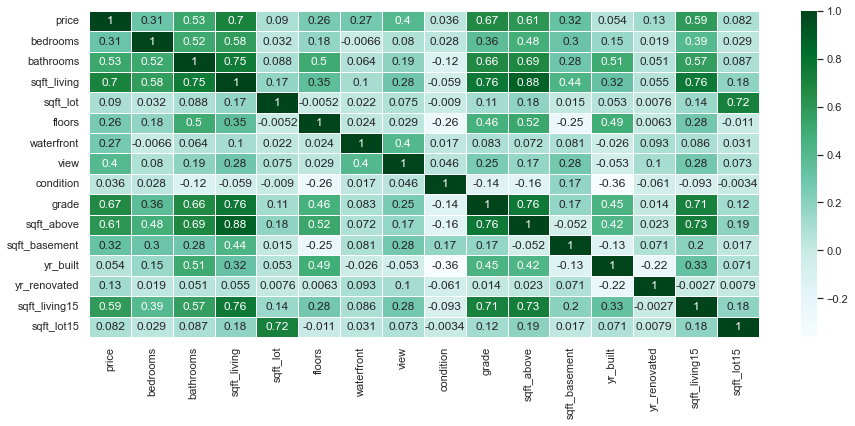

In [123]:
# Revision de correlaciones y seleccion de variables
sns.set(rc={'figure.figsize':(15,6)})
sns.heatmap(df.corr(method='pearson'), annot = True, linewidths=.5, cmap = 'BuGn')

df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade',
      'sqft_above', 'sqft_basement', 'yr_renovated','sqft_living15']]

**Divide los datos.**

In [124]:
# Variables
X = df.drop(labels = 'price', axis = 1)
y = df['price']

# Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

#### Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada

In [ ]:
lrm = LinearRegression()
lrm.fit(Xtrain, ytrain)

yhatTr = lrm.predict(Xtrain)
yhatTe = lrm.predict(Xtest)

lrm.intercept_, lrm.coef_

$y = -5190441 -28428  bedrooms -2.5464bathrooms + 1.3654sqft-living -6.597floors + 575231 waterfront+58084 view+ 103262grade + 43 sqft-above+ 9.2sqft-basement + 67yr-renovated + 7sqft-living15$

In [139]:
# Errores
mae_lrm = mean_absolute_error(ytrain, yhatTr ).round(2)
rmse_lrm = np.sqrt(mean_squared_error(ytrain, yhatTr )).round(2)
r2_lrm = r2_score(ytrain, yhatTr ).round(2)

print('Error medio Absoluto (MAE):',mae_lrm)
print('Root Mean Squared Error:', rmse_lrm )
print('r2_score',r2_lrm)

Error medio Absoluto (MAE): 153043.98
Root Mean Squared Error: 231285.57
r2_score 0.61


#### Regresión Múltiple Polinomial.
Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [137]:
poly = PolynomialFeatures(degree = 2, include_bias=False)
XtrainP = poly.fit_transform(Xtrain)
# XtestP5 = poly.fit_transform(Xtest)
# XtrainP5 = Xtrain
# XtestP5 = Xtest

lrm.fit(XtrainP, ytrain)


yhatTr_poly = lrm.predict(XtrainP)

lrm.intercept_, lrm.coef_

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.585e+14, tolerance: 2.343e+11
  model = cd_fast.enet_coordinate_descent(


(373257.1463266519,
 array([-3.33585629e+04, -1.06136265e+05, -2.50552871e+02,  9.14714409e+04,
         4.51767605e+05, -8.79032060e+04, -7.97912420e+04,  3.77937340e+01,
         1.95681156e+02, -5.19282441e+01,  2.30155338e+02,  9.85270513e+02,
        -8.28513277e+03,  4.85947728e+00,  1.70276816e+04,  6.35639347e+02,
        -2.80348729e+03,  1.70405592e+02, -3.03403308e+00, -2.26876331e+01,
        -7.77441751e+00,  1.20150952e+01,  1.34220790e+04,  2.87599643e+01,
        -4.79084087e+04,  6.05173681e+04,  5.68362347e+03,  1.97075315e+04,
        -2.05080868e+01, -4.13774114e+01, -1.84283274e+00, -1.73485406e+01,
         5.80408557e-02,  1.44713477e+01, -8.46453802e+01,  2.40087387e+01,
         1.17784572e+01, -3.99380770e-02,  1.24084197e-02,  6.43064020e-02,
        -1.97044512e-02,  1.14135954e+04, -1.36829229e+05,  1.93191379e+04,
         5.71696025e+03,  9.79938745e+00,  9.33594368e+01, -2.32311926e+00,
        -9.22052693e+01, -3.64311762e+05, -1.64352360e+03, -1.104974

In [138]:
# Errores
mae_lrmPoly = mean_absolute_error(ytrain, yhatTr_poly ).round(2)
rmse_lrmPoly = np.sqrt(mean_squared_error(ytrain, yhatTr_poly )).round(2)
r2_lrmPoly = r2_score(ytrain, yhatTr_poly ).round(2)

print('Error medio Absoluto (MAE):',mae_lrmPoly)
print('Root Mean Squared Error:', rmse_lrmPoly )
print('r2_score',r2_lrmPoly)

Error medio Absoluto (MAE): 138474.88
Root Mean Squared Error: 203649.12
r2_score 0.69


**Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.**

In [147]:
# Ridge
ridge_lrm = Ridge(alpha=10)
ridge_lrm.fit(Xtrain,ytrain)
y_pred_ridgelrm = ridge_lrm.predict(Xtrain)

ridge_lrm.intercept_, ridge_lrm.coef_

(-517080.54368764046,
 array([-2.86393063e+04, -2.53866613e+04,  1.36723075e+02, -6.53319860e+03,
         5.28213766e+05,  6.03173292e+04,  1.02980048e+05,  4.39678411e+01,
         9.27552966e+01,  6.76655424e+01,  7.08965050e+00]))

In [148]:
# Errores
mae_lrmRidge = mean_absolute_error(ytrain, y_pred_ridgelrm  ).round(2)
rmse_lrmRidge = np.sqrt(mean_squared_error(ytrain, y_pred_ridgelrm  )).round(2)
r2_lrmRidge = r2_score(ytrain, y_pred_ridgelrm  ).round(2)

print('Error medio Absoluto (MAE):',mae_lrmRidge)
print('Root Mean Squared Error:', rmse_lrmRidge )
print('r2_score',r2_lrmRidge)

Error medio Absoluto (MAE): 153057.26
Root Mean Squared Error: 231316.49
r2_score 0.61


In [149]:
# Lasso
lasso_lrm = Lasso(alpha=10)
lasso_lrm.fit(Xtrain,ytrain)
y_pred_lassorm = lasso_lrm.predict(Xtrain)

lasso_lrm.intercept_, lasso_lrm.coef_

(-518944.8021170597,
 array([-2.84258295e+04, -2.54361386e+04,  3.08268367e+02, -6.54528823e+03,
         5.73761286e+05,  5.81393936e+04,  1.03227260e+05, -1.28082328e+02,
        -7.88051292e+01,  6.71897804e+01,  7.32979719e+00]))

In [150]:
# Errores
mae_lrmLasso = mean_absolute_error(ytrain, y_pred_lassorm  ).round(2)
rmse_lrmLasso = np.sqrt(mean_squared_error(ytrain, y_pred_lassorm  )).round(2)
r2_lrmLasso = r2_score(ytrain, y_pred_lassorm  ).round(2)

print('Error medio Absoluto (MAE):',mae_lrmLasso)
print('Root Mean Squared Error:', rmse_lrmLasso )
print('r2_score',r2_lrmLasso)

Error medio Absoluto (MAE): 153043.7
Root Mean Squared Error: 231285.61
r2_score 0.61


**Finalmente grafica:  
MAE (de los cuatro métodos)  
R2 (de los cuatro métodos)**

In [152]:
a =pd.DataFrame(
    {'MODELO':['LR','Polinomial','Ridge','Lasso'],
'MAE':[mae_lrm, mae_lrmPoly ,mae_lrmRidge,mae_lrmLasso],
'R2':[r2_lrm, r2_lrmPoly ,r2_lrmRidge,r2_lrmLasso]}
)
a.head()

,MODELO,MAE,R2
0,LR,153043.98,0.61
1,Polinomial,138474.88,0.69
2,Ridge,153057.26,0.61
3,Lasso,153043.70,0.61


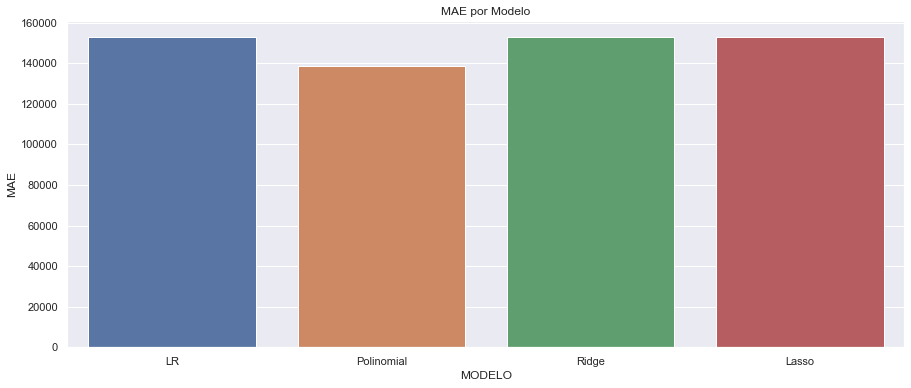

In [153]:
sns.barplot(data=a, x="MODELO", y="MAE")
plt.title('MAE por Modelo')
plt.show()

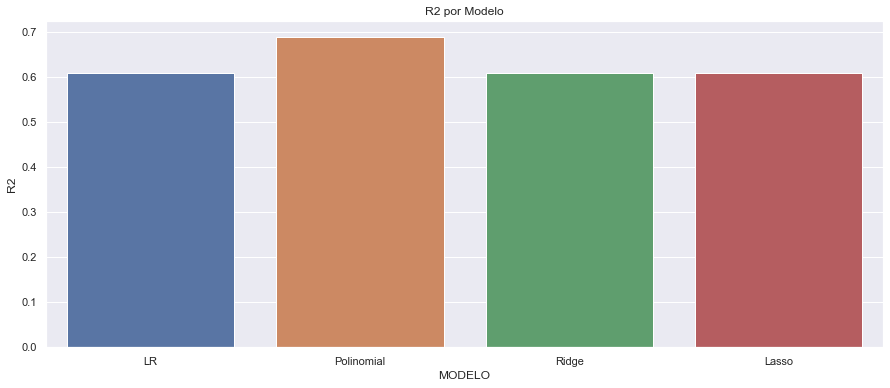

In [154]:
sns.barplot(data=a, x="MODELO", y="R2")
plt.title('R2 por Modelo')
plt.show()

**Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Al igual que el ejercicio anterior, el mejor modelo resulta ser el polinomial debido a la distribución de los datos que no son lineales. Se ocuparon 20% de test y 80% para entrenamiento y test. Los errores son bajos y el R2 son altos por lo que el modelo polinomial es el mejor